# Assignment 5B

In this iPython Notebook, I will be scraping the NYT bestsellers list and performing various graphical analysis on the data.

In [50]:
import requests
import pandas as pd
import matplotlib as plt
import re

from bs4 import BeautifulSoup
from time import sleep

In [41]:
# This is the link we will be using to scrape:
# https://www.nytimes.com/books/best-sellers/2017/12/31/combined-print-and-
#         e-book-fiction/?action=click&contentCollection=Books&referrer&region=Header
#         &module=ArrowNav&version=Right&pgtype=Reference

# we will be making requests changing at the year, so that we can collect from 2011 to 2018.
year = [x for x in range(2011,2019)]
url1 = "https://www.nytimes.com/books/best-sellers/"
url2 = "/12/31/combined-print-and-e-book-fiction/?action=click&contentCollection=Books&referrer&region=Header&module=ArrowNav&version=Right&pgtype=Reference"

# and so the request url will look like: url1 + str(y) + url 2 for y in year

In [42]:
# lets now make one request to find the exact location of each component
resp = requests.get(url1 + '2011' + url2)
html_bs = BeautifulSoup(resp.text)

In [75]:
# all books are in a tag called 'ol' , non recursive so we can
# solely just get children not children's children
book_menu = html_bs.find('ol', class_ = 'book-menu').findChildren(recursive = False)
# books = book_menu.findAll('li')
# print(book_menu)
for book in book_menu:
    if("extended-list" not in book['class']):
        print("\nNewBook:\n")
        # header2 has the book title
        title = book.find('h2', {'class':'title'}).text
        print("Title: " + title)
        # paragraph with this class has author
        auth = book.find('p', {'class':'author'}).text.split(' ', 1)[1]
        print("Author: " + auth)
        fresh = book.find('p', {'class':'freshness'}).text.split(' ')[0]
        try:
            # try to cast to int
            fresh = int(fresh)
        except ValueError:
            # if it doesnt work its new, set fresh to 0
            fresh = 0
        print("Weeks: " + str(fresh))
        pub = book.find('p', {'class':'publisher'}).text
        print("publisher: " + pub)



NewBook:

Title: 11/22/63
Author: Stephen King
Weeks: 6
publisher: Scribner

NewBook:

Title: LOCKED ON
Author: Tom Clancy with Mark Greaney
Weeks: 0
publisher: Penguin Group

NewBook:

Title: THE HELP
Author: Kathryn Stockett
Weeks: 44
publisher: Penguin Group

NewBook:

Title: THE LITIGATORS
Author: John Grisham
Weeks: 8
publisher: Knopf Doubleday Publishing

NewBook:

Title: THE GIRL WITH THE DRAGON TATTOO
Author: Stieg Larsson
Weeks: 18
publisher: Knopf Doubleday Publishing

NewBook:

Title: KILL ALEX CROSS
Author: James Patterson
Weeks: 5
publisher: Little, Brown & Company

NewBook:

Title: RED MIST
Author: Patricia Cornwell
Weeks: 2
publisher: Penguin Group

NewBook:

Title: THE DROP
Author: Michael Connelly
Weeks: 3
publisher: Little, Brown & Company

NewBook:

Title: EXPLOSIVE EIGHTEEN
Author: Janet Evanovich
Weeks: 4
publisher: Random House Publishing

NewBook:

Title: DEATH COMES TO PEMBERLEY
Author: P. D. James
Weeks: 2
publisher: Knopf Doubleday Publishing

NewBook:

Title

In [82]:
# Now that we know where everything is, we can start the wobscrape

# create a dict to store everything for the dataframe
BestSellers = {
    'year'     : [],
    'title'    : [],
    'author'   : [],
    'num_weeks': [],
    'publisher': []
}

for y in year:
    url = "{0}{1}{2}".format(url1, y, url2)
    # print (url)
    resp = requests.get(url)
    html_bs = BeautifulSoup(resp.text)
    
    book_menu = html_bs.find('ol', class_ = 'book-menu').findChildren(recursive = False)
    
    for book in book_menu:
        if("extended-list" not in book['class']):
            BestSellers['year'].append(y)
            
            # header2 has the book title
            title = book.find('h2', {'class':'title'}).text
            BestSellers['title'].append(title)
            
            # paragraph with this class has author
            auth = book.find('p', {'class':'author'}).text.split(' ', 1)[1]
            BestSellers['author'].append(auth)
            
            fresh = book.find('p', {'class':'freshness'}).text.split(' ')[0]
            try:
                # try to cast to int
                fresh = int(fresh)
            except ValueError:
                # if it doesnt work its new, set fresh to 0
                fresh = 0
            BestSellers['num_weeks'].append(fresh)
            
            pub = book.find('p', {'class':'publisher'}).text
            BestSellers['publisher'].append(pub)
    
    # sleep to not overload the site with requests
    sleep(3.5)
    

In [86]:
bs_df = pd.DataFrame(BestSellers)
bs_df.head()

,year,title,author,num_weeks,publisher
0,2011,11/22/63,Stephen King,6,Scribner
1,2011,LOCKED ON,Tom Clancy with Mark Greaney,0,Penguin Group
2,2011,THE HELP,Kathryn Stockett,44,Penguin Group
3,2011,THE LITIGATORS,John Grisham,8,Knopf Doubleday Publishing
4,2011,THE GIRL WITH THE DRAGON TATTOO,Stieg Larsson,18,Knopf Doubleday Publishing


Average Weeks on NYT BS: 11.925


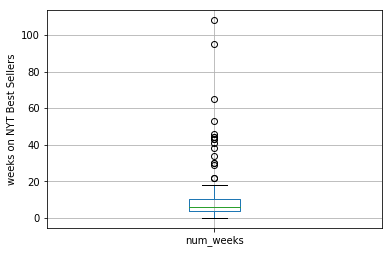

In [94]:
# Part A boxplot of mean num_weeks in bestsellers list
mean = bs_df['num_weeks'].mean()
bs_plt = bs_df.boxplot(column=['num_weeks'],)
bs_plt.set_ylabel('weeks on NYT Best Sellers')
print("Average Weeks on NYT BS: " + str(mean))

In [99]:
sorted_df = bs_df.sort_values('num_weeks', ascending = False)
sorted_df.head()

# take the first 20
top_bs = sorted_df[:20]
top_bs

,year,title,author,num_weeks,publisher
46,2014,GONE GIRL,Gillian Flynn,108,Crown
81,2016,THE GIRL ON THE TRAIN,Paula Hawkins,95,Riverhead
63,2015,ALL THE LIGHT WE CANNOT SEE,Anthony Doerr,65,Scribner
117,2018,MILK AND HONEY,Rupi Kaur,53,Andrews McMeel
64,2015,THE GIRL ON THE TRAIN,Paula Hawkins,46,Riverhead
2,2011,THE HELP,Kathryn Stockett,44,Penguin Group
96,2017,MILK AND HONEY,Rupi Kaur,44,Andrews McMeel
26,2012,FIFTY SHADES DARKER,E. L. James,43,Knopf Doubleday Publishing
17,2012,FIFTY SHADES OF GREY,E. L. James,43,Knopf Doubleday Publishing
27,2012,FIFTY SHADES FREED,E. L. James,41,Knopf Doubleday Publishing
